In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

# Preprocessing

In [2]:
df = pd.read_excel('../data/GL_behavior_con.xlsx')
df_melted2 = pd.melt(df, id_vars=["Unnamed: 0"], 
                    value_vars=[f"Y{i}" for i in range(1, 5)], 
                    var_name="Run",
                    value_name='Y')

# Extracting XA, XB, and XC values for each functional run and participant
for prefix in ["XA", "XB", "XC", "XD", "XE", "XF", "XG", "XH", "XI", "nY", "nXA", "nXB", "nXC", "nXD", "nXE", "nXF", "nXG", "nXH", "nXI"]:
    df_melted2[prefix] = df_melted2.apply(lambda row: df.at[row["Unnamed: 0"], f"{prefix}{row['Run'][1]}"], axis=1)

# Renaming the 'Unnamed: 0' column to 'Participant'
df_melted2 = df_melted2.rename(columns={"Unnamed: 0": "Participant"})

# Displaying the reshaped dataframe
print(df_melted2)

    Participant Run         Y        XA        XB        XC        XD  \
0             0  Y1  0.173843  0.311939  0.193193  0.146982  0.092920   
1             1  Y1  0.396354  0.253556  0.179394  0.376907  0.136628   
2             2  Y1  0.181944  0.397014  0.005715 -0.021800  0.464521   
3             3  Y1  0.134896  0.585376  0.337665 -0.028184  0.612987   
4             4  Y1  0.182350  0.352137  0.387990 -0.080488  0.461723   
..          ...  ..       ...       ...       ...       ...       ...   
91           19  Y4  0.566898  0.372670  0.398018  0.147996  0.289133   
92           20  Y4  0.540625  0.304874  0.413692  0.188170  0.301825   
93           21  Y4  0.384838  0.280372  0.035014 -0.056040  0.364194   
94           22  Y4  0.386285  0.314856  0.288872  0.143907  0.312225   
95           23  Y4  0.478125  0.353334  0.117478  0.458497  0.398607   

          XE        XF        XG  ...        nY       nXA       nXB       nXC  \
0   0.068852  0.115791  0.047419  ...  0.0

In [3]:
df_CF = df_melted2.iloc[:, :12]
df_BF = df_melted2.iloc[:, 12:]
df_BF = pd.concat([df_CF.iloc[:,:2], df_BF], axis=1)
print(df_CF)
print(df_BF)

    Participant Run         Y        XA        XB        XC        XD  \
0             0  Y1  0.173843  0.311939  0.193193  0.146982  0.092920   
1             1  Y1  0.396354  0.253556  0.179394  0.376907  0.136628   
2             2  Y1  0.181944  0.397014  0.005715 -0.021800  0.464521   
3             3  Y1  0.134896  0.585376  0.337665 -0.028184  0.612987   
4             4  Y1  0.182350  0.352137  0.387990 -0.080488  0.461723   
..          ...  ..       ...       ...       ...       ...       ...   
91           19  Y4  0.566898  0.372670  0.398018  0.147996  0.289133   
92           20  Y4  0.540625  0.304874  0.413692  0.188170  0.301825   
93           21  Y4  0.384838  0.280372  0.035014 -0.056040  0.364194   
94           22  Y4  0.386285  0.314856  0.288872  0.143907  0.312225   
95           23  Y4  0.478125  0.353334  0.117478  0.458497  0.398607   

          XE        XF        XG        XH        XI  
0   0.068852  0.115791  0.047419  0.077224  0.644033  
1   0.201291 

In [4]:
df_CF_sum = pd.concat([df_CF.iloc[:,:3], df_CF.iloc[:, 3:].sum(axis=1)], axis=1)
df_BF_sum = pd.concat([df_BF.iloc[:,:3], df_BF.iloc[:, 3:].sum(axis=1)], axis=1)

df_CF_sum = df_CF_sum.rename(columns={0: 'x'})
df_BF_sum = df_BF_sum.rename(columns={0: 'x'})

df_BF_sum

,Participant,Run,nY,x
0,0,Y1,0.063484,0.864450
1,1,Y1,0.181597,1.217320
2,2,Y1,0.042940,1.252050
3,3,Y1,0.051331,2.020161
4,4,Y1,0.018403,0.986137
...,...,...,...,...
91,19,Y4,0.070312,1.984119
92,20,Y4,0.256887,0.083787
93,21,Y4,0.141493,1.167641
94,22,Y4,0.052431,2.035917


# T-test

In [5]:
run1_data = df_CF_sum[df_CF_sum['Run'] == 'Y1']
x_run1 = run1_data['x']

run4_data = df_CF_sum[df_CF_sum['Run'] == 'Y4']
x_run4 = run4_data['x']

In [6]:
stats.ttest_rel(x_run1, x_run4)

TtestResult(statistic=0.5080006514265208, pvalue=0.6162904514144126, df=23)

In [7]:
run1_data = df_BF_sum[df_BF_sum['Run'] == 'Y1']
x_run1 = run1_data['x']

run4_data = df_BF_sum[df_BF_sum['Run'] == 'Y4']
x_run4 = run4_data['x']

In [8]:
stats.ttest_rel(x_run1, x_run4)

TtestResult(statistic=0.6322748014811396, pvalue=0.5334428644191693, df=23)

# LME

In [9]:
# Fitting the linear mixed-effects model
model_formula = "Y ~ x"
lmm = smf.mixedlm(model_formula, df_CF_sum, groups=df_CF_sum["Participant"]).fit()

# Lmer('Y ~ XA', data=df_melted)
# Displaying the model summary
print(lmm.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Y      
No. Observations: 96      Method:             REML   
No. Groups:       24      Scale:              0.0168 
Min. group size:  4       Log-Likelihood:     44.3367
Max. group size:  4       Converged:          Yes    
Mean group size:  4.0                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.430    0.042 10.199 0.000  0.347  0.512
x          -0.049    0.024 -2.075 0.038 -0.095 -0.003
Group Var   0.006    0.027                           



/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


/var/folders/5l/5jx0ryjd29d_6j6kvcyfc7cr0000gn/T/ipykernel_56742/390730690.py:3: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(data=df_CF_sum, x="x", y="Y", hue="Run", style='Run', palette=['gray'], markers=["o", "s", "^", "X"], s=70)


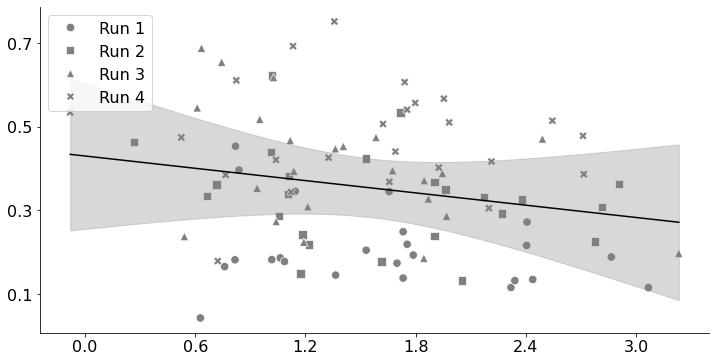

In [10]:
plt.figure(figsize=(12, 6))

ax = sns.scatterplot(data=df_CF_sum, x="x", y="Y", hue="Run", style='Run', palette=['gray'], markers=["o", "s", "^", "X"], s=70)

intercept_coeff = lmm.params['Intercept']
slope_coeff = lmm.params['x']
std_err_intercept = lmm.bse['Intercept']
std_err_slope = lmm.bse['x']

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-demo-py
x = df_CF_sum.sort_values(by="x")["x"]
y = df_CF_sum.sort_values(by="Y")["Y"]
y_est = intercept_coeff + slope_coeff * x
y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))

ax.plot(x, y_est, '-', color='black')
ax.fill_between(x, y_est - y_err, y_est + y_err, color='gray', alpha=0.3)

for text, new in zip(plt.legend(fontsize=16, loc='upper left').texts, ['Run 1', 'Run 2', 'Run 3', 'Run 4']):
    text.set_text(new) 
    
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(np.arange(0, max(x), step=0.6))
plt.yticks(np.arange(0.1, max(y), 0.2))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# fname = '/Users/clmn/Desktop/Andy/Masters/Articles/GL/figures/figS6/v02/LME_CF.png'
# plt.savefig(fname, dpi=600)
# plt.close()

In [11]:
# Fitting the linear mixed-effects model
model_formula = "nY ~ x"
lmm = smf.mixedlm(model_formula, df_BF_sum, groups=df_BF_sum["Participant"]).fit()

# Lmer('Y ~ XA', data=df_melted)
# Displaying the model summary
print(lmm.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: nY      
No. Observations: 96      Method:             REML    
No. Groups:       24      Scale:              0.0041  
Min. group size:  4       Log-Likelihood:     102.2818
Max. group size:  4       Converged:          Yes     
Mean group size:  4.0                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.136    0.021  6.604 0.000  0.095  0.176
x           -0.015    0.013 -1.153 0.249 -0.040  0.010
Group Var    0.004    0.028                           


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


/var/folders/5l/5jx0ryjd29d_6j6kvcyfc7cr0000gn/T/ipykernel_56742/1945987576.py:3: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(data=df_BF_sum, x="x", y="nY", hue="Run", style='Run', palette=['gray'], markers=["o", "s", "^", "X"], s=70)


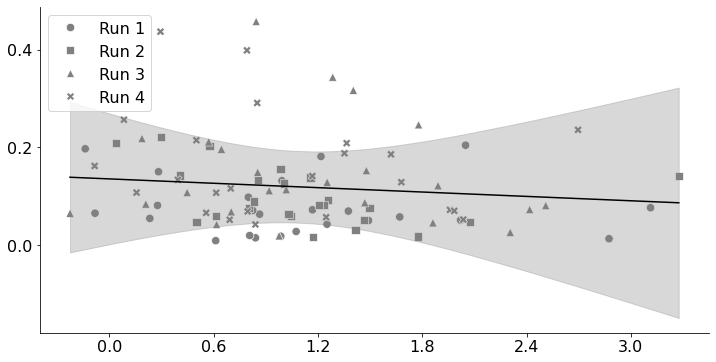

In [12]:
plt.figure(figsize=(12, 6))

ax = sns.scatterplot(data=df_BF_sum, x="x", y="nY", hue="Run", style='Run', palette=['gray'], markers=["o", "s", "^", "X"], s=70)

intercept_coeff = lmm.params['Intercept']
slope_coeff = lmm.params['x']
std_err_intercept = lmm.bse['Intercept']
std_err_slope = lmm.bse['x']

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-demo-py
x = df_BF_sum.sort_values(by="x")["x"]
y = df_BF_sum.sort_values(by="nY")["nY"]
y_est = intercept_coeff + slope_coeff * x
y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))

ax.plot(x, y_est, '-', color='black')
ax.fill_between(x, y_est - y_err, y_est + y_err, color='gray', alpha=0.3)

for text, new in zip(plt.legend(fontsize=16, loc='upper left').texts, ['Run 1', 'Run 2', 'Run 3', 'Run 4']):
    text.set_text(new) 
    
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(np.arange(0, max(x), step=0.6))
plt.yticks(np.arange(0, max(y), 0.2))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# fname = '/Users/clmn/Desktop/Andy/Masters/Articles/GL/figures/figS6/v02/LME_BF.png'
# plt.savefig(fname, dpi=600)
# plt.close()